# Continuous Time Kalman Filter
## Example on 11-20

In [1]:
from os.path import exists
file_exists = exists('basic_material.py')

if (not file_exists):
  !wget -O basic_material.py https://www.dropbox.com/s/o48uhuwah8n2xww/basic_material.py?dl=0
%run basic_material

try:
    %reload_ext autoreload
except:
    %load_ext autoreload
%autoreload 2

from numpy.random import randn
from numpy import eye, array, asarray, exp

from math import sqrt
from scipy.linalg import expm, solve_discrete_lyapunov, sqrtm
from scipy import linalg as la
from scipy.integrate import odeint

Running Python: 3.9.9


In [2]:
A = np.array([0.])
Nx = A.shape[0]
C = np.array([1.])
Bw = np.array([1.])
Wc = np.array([2.])
Rc = np.array([4.])
Q0 = np.array([5.])

tf = 5 # time steps to consider
Npts = 1000 # time steps to consider
t = np.linspace(0,tf,Npts)

# Covariance Riccati Prop 
def doty(y, t, A, B, C, W, R): 
    n = A.shape[0]
    Q = y.reshape(n,n)
    Q = (Q+Q.T)/2.0 # make symmetric
    Rterm = np.multiply(C.T,np.linalg.inv(np.atleast_2d(R)))@C
    dotQ = A@Q + Q@A.T + np.multiply(B,W)@B.T - Q@Rterm@Q 
    return dotQ.reshape(n,)
    
# integrate Q
Qsol = odeint(doty, Q0, t, args=(A, Bw, C, Wc, Rc))
Qsol0 = odeint(doty, 0*Q0, t, args=(A, Bw, C, Wc, Rc))
# steady state Q (see 11-13)
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_continuous_are.html
Qcss = la.solve_continuous_are(A.T, C.T, np.multiply(Bw,Wc)@Bw.T, Rc) # note - here

alpha = np.sqrt(Wc/Rc)
b = (Q0-np.sqrt(Wc*Rc))/(Q0+np.sqrt(Wc*Rc))
Qc_analytic = np.sqrt(Wc*Rc)*(1+b*np.exp(-2*alpha*t))/(1-b*np.exp(-2*alpha*t))
b0 = (0*Q0-np.sqrt(Wc*Rc))/(0*Q0+np.sqrt(Wc*Rc))
Qc_analytic0 = np.sqrt(Wc*Rc)*(1+b0*np.exp(-2*alpha*t))/(1-b0*np.exp(-2*alpha*t))

Steady State Continuous Q(t) = 2.8284
Expected SS Continuous Q(t) = 2.8284


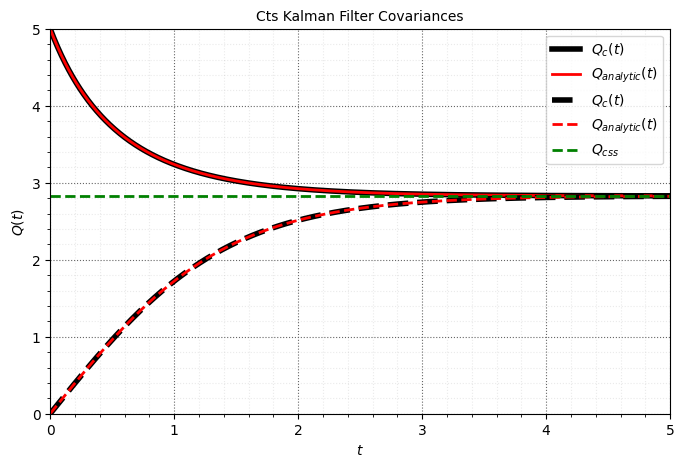

In [3]:
plt.figure(14,figsize=(8,5))
ax1 = plt.subplot(111)
ax1.plot(t,Qsol,'k-',lw=4,label=r'$Q_{c}(t)$')
ax1.plot(t,Qc_analytic,'r-',lw=2,label=r'$Q_{analytic}(t)$')
ax1.plot(t,Qsol0,'k--',lw=4,label=r'$Q_{c}(t)$')
ax1.plot(t,Qc_analytic0,'r--',lw=2,label=r'$Q_{analytic}(t)$')
ax1.plot([0,tf],[Qcss[0,0],Qcss[0,0]],'g--',label=r'$Q_{css}$')
plt.title('Cts Kalman Filter Covariances')
print(f'Steady State Continuous Q(t) = {Qcss.item():.4f}')
print(f'Expected SS Continuous Q(t) = {sqrt(Wc*Rc):.4f}')

plt.ylim(0,5+2*int(Qcss[0,0]))
plt.ylabel(r'$Q(t)$')
plt.xlabel(r'$t$')
plt.xlim(0,tf)
plt.ylim(0,Q0)
plt.legend()
nicegrid()
plt.savefig('figs/Ex11_20.png',dpi=600, format="png",transparent=True)
plt.show()